Посмотрим структуру датасета и общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/sales_forecasting_dataset.csv')

print("Первые 5 строк датасета:")
display(df.head())

print("\nОбщая информация о датасете:")
display(df.info())

Первые 5 строк датасета:


,date,product_id,sales_volume,raw_material_price,fuel_price,exchange_rate,market_demand_index,production_capacity,month,is_holiday,season,sales_lag_1,sales_lag_3,sales_lag_6
0,2000-01-31,Aluminium,302,133.723439,41.420218,83.390730,70,1602,1,1,winter,NaN,NaN,NaN
1,2000-02-29,Aluminium,253,118.089201,NaN,60.617535,73,1991,2,0,winter,302.0,NaN,NaN
2,2000-03-31,Aluminium,251,94.339379,53.366475,72.958351,76,1558,3,0,winter,253.0,NaN,NaN
3,2000-04-30,Aluminium,255,106.485599,62.481159,65.990213,52,1984,4,0,spring,251.0,302.0,NaN
4,2000-05-31,Aluminium,294,145.376140,54.715088,71.562495,51,1839,5,1,spring,255.0,253.0,NaN



Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 302 non-null    object 
 1   product_id           302 non-null    object 
 2   sales_volume         302 non-null    int64  
 3   raw_material_price   283 non-null    float64
 4   fuel_price           288 non-null    float64
 5   exchange_rate        294 non-null    float64
 6   market_demand_index  302 non-null    int64  
 7   production_capacity  302 non-null    int64  
 8   month                302 non-null    int64  
 9   is_holiday           302 non-null    int64  
 10  season               302 non-null    object 
 11  sales_lag_1          301 non-null    float64
 12  sales_lag_3          299 non-null    float64
 13  sales_lag_6          296 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 33.2+ KB


None

Проверим, есть ли пропущенные значения в датасете, и проанализируем их распределение.


Количество пропущенных значений по каждому признаку:


date                    0
product_id              0
sales_volume            0
raw_material_price     19
fuel_price             14
exchange_rate           8
market_demand_index     0
production_capacity     0
month                   0
is_holiday              0
season                  0
sales_lag_1             1
sales_lag_3             3
sales_lag_6             6
dtype: int64

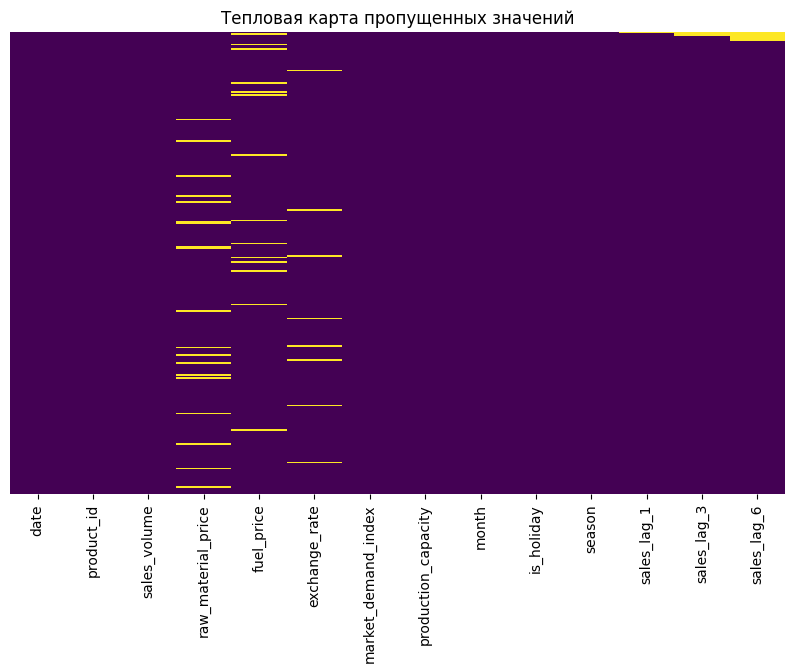

In [2]:
missing_values = df.isnull().sum()
print("\nКоличество пропущенных значений по каждому признаку:")
display(missing_values)

# Визуализация пропущенных значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропущенных значений')    
plt.show()

Посмотрим основные статистические характеристики числовых признаков.

In [3]:
print("\nОписательная статистика для числовых признаков:")
display(df.describe(include='number'))


Описательная статистика для числовых признаков:


,sales_volume,raw_material_price,fuel_price,exchange_rate,market_demand_index,production_capacity,month,is_holiday,sales_lag_1,sales_lag_3,sales_lag_6
count,302.000000,283.000000,288.000000,294.000000,302.000000,302.000000,302.000000,302.000000,301.000000,299.000000,296.000000
mean,197.182119,112.425135,52.484585,76.302539,75.006623,1760.062914,6.466887,0.251656,196.053156,193.765886,189.547297
std,157.702788,26.141697,10.455109,10.434784,14.827691,149.629707,3.470411,0.434685,156.738223,154.717665,149.658881
min,0.000000,64.903521,32.448678,60.208564,50.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,65.750000,90.779708,43.169337,67.702387,62.000000,1633.250000,3.000000,0.000000,65.000000,64.000000,63.000000
50%,153.000000,112.040370,52.241756,75.992007,75.000000,1766.000000,6.000000,0.000000,153.000000,153.000000,152.000000
75%,293.000000,132.523106,61.224570,82.814354,89.000000,1899.000000,9.000000,0.750000,293.000000,290.500000,284.250000
max,634.000000,186.608441,79.098085,115.159156,99.000000,1999.000000,12.000000,1.000000,634.000000,634.000000,549.000000


Посмотрим уникальные значения и их частоты для категориальных признаков.

In [4]:
categorical_columns = ['product_id', 'season']
for col in categorical_columns:
    print(f"\nУникальные значения в '{col}':")
    display(df[col].value_counts())


Уникальные значения в 'product_id':


product_id
Aluminium    302
Name: count, dtype: int64


Уникальные значения в 'season':


season
winter    77
spring    75
summer    75
fall      75
Name: count, dtype: int64

Построим гистограммы для числовых признаков, чтобы понять их распределения.

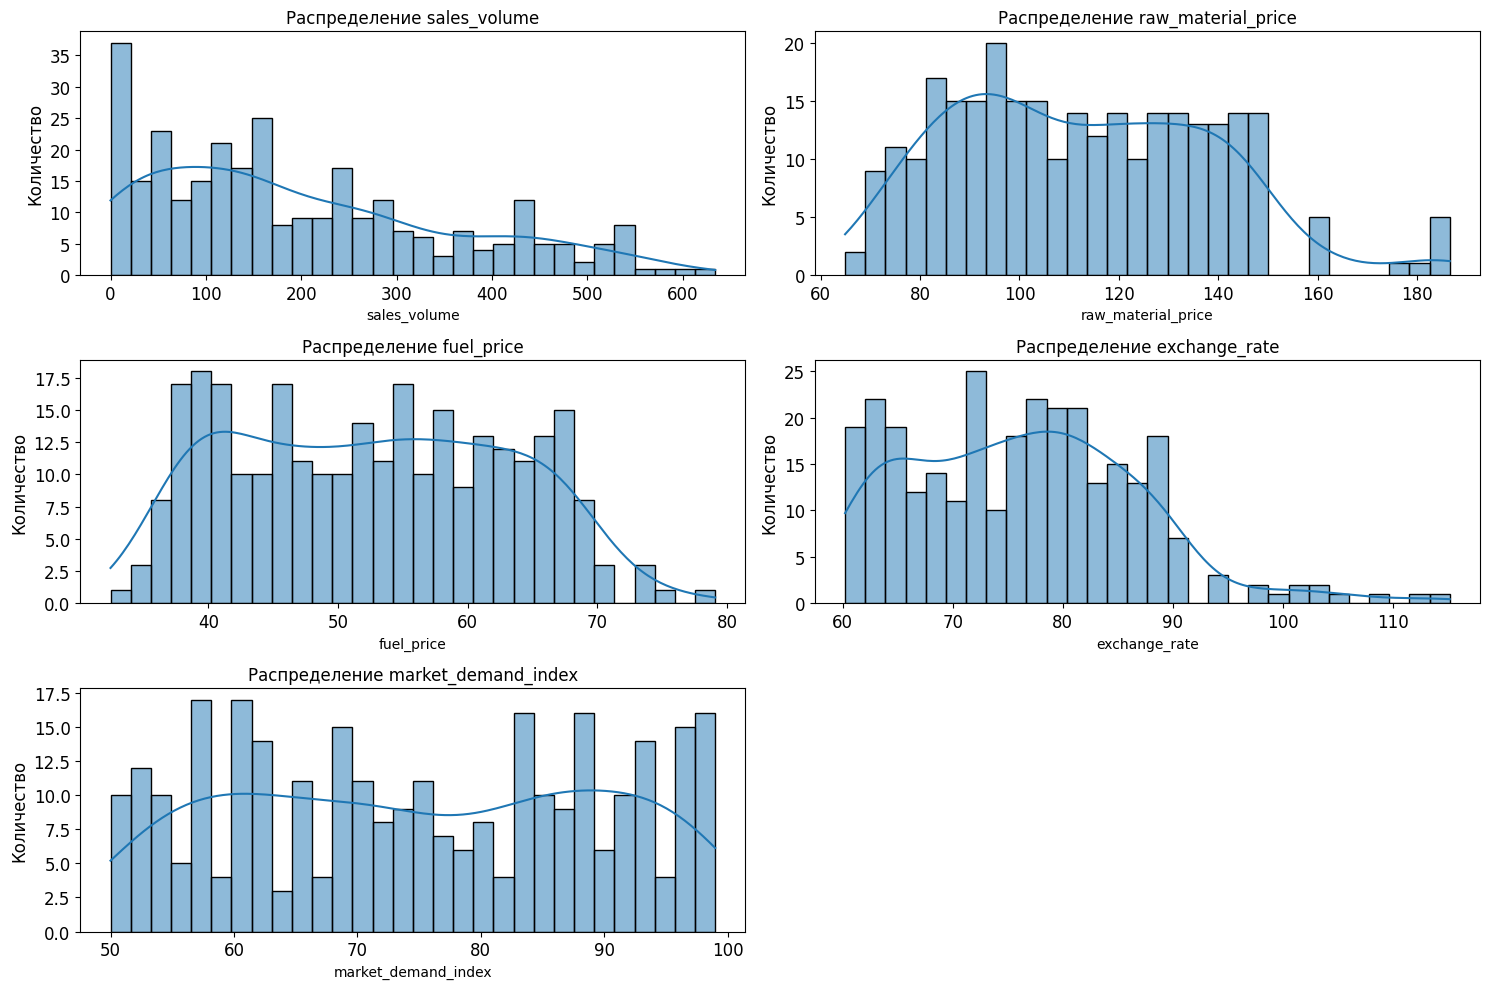

In [5]:
numeric_columns = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Количество', fontsize=12)
plt.tight_layout()
plt.show()

Посчитаем корреляции между числовыми признаками и построим тепловую карту.

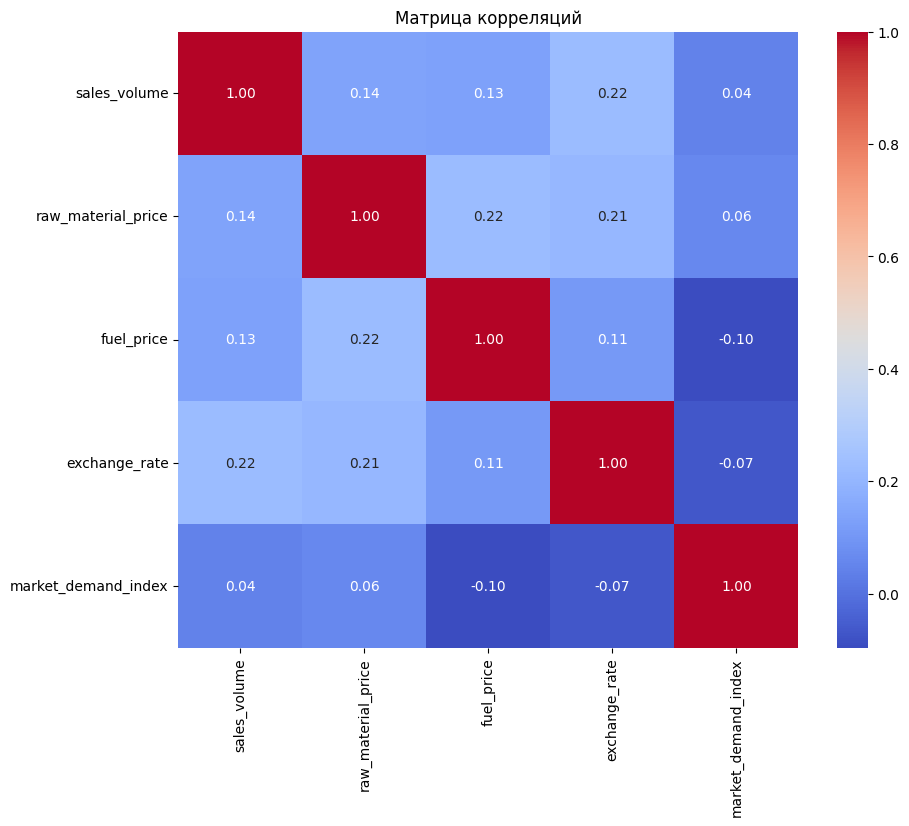

In [6]:
correlation_matrix = df[numeric_columns].corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Поскольку данные имеют временную компоненту, построим график продаж во времени.

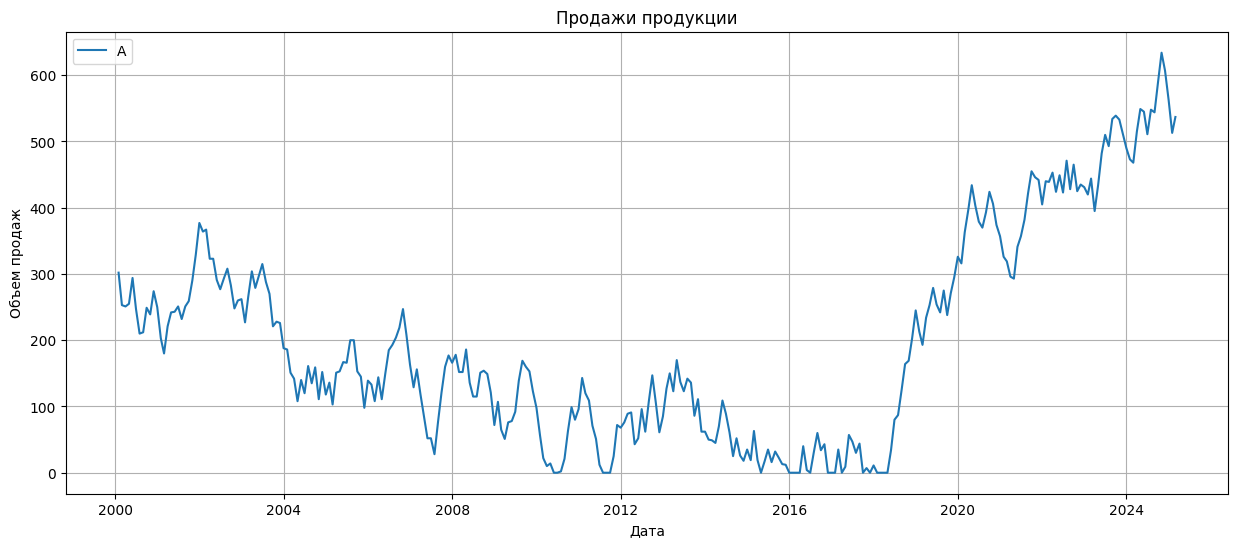

In [7]:
df['date'] = pd.to_datetime(df['date'])

# Агрегация данных по месяцам для каждого продукта
df_grouped = df.groupby(['date', 'product_id'])['sales_volume'].sum().reset_index()

# Построение графиков продаж во времени
plt.figure(figsize=(15, 6))
for product in df_grouped['product_id'].unique():
    subset = df_grouped[df_grouped['product_id'] == product]
    plt.plot(subset['date'], subset['sales_volume'], label=product)
plt.title('Продажи продукции')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.grid()
plt.legend('Aluminium')
plt.show()

На основе проведенного анализа мы можем сделать следующие выводы:

Пропущенные значения: Пропуски есть только в лаговых переменных, что объясняется их конструкцией. Их можно заполнить средними значениями или использовать интерполяцию.

Распределения: Некоторые признаки (например, sales_volume) могут иметь скошенное распределение, что требует преобразования.

Корреляции: Высокая корреляция между некоторыми признаками (например, raw_material_price и sales_volume) указывает на важность этих факторов.

Временной ряд: Существуют сезонные паттерны, которые необходимо учесть при прогнозировании.


Предобработаем даные

In [8]:
    # Скользящие средние
df['rolling_mean_3'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_mean_6'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=6).mean())
    
    # Разница между текущими и предыдущими значениями
df['sales_diff_1'] = df.groupby('product_id')['sales_volume'].diff(1)
df['sales_diff_3'] = df.groupby('product_id')['sales_volume'].diff(3)
df['sales_diff_6'] = df.groupby('product_id')['sales_volume'].diff(6)

In [9]:
numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'sales_lag_1', 'sales_lag_3', 'sales_lag_6','rolling_mean_3', 'rolling_mean_6', 'sales_diff_1', 'sales_diff_3', 'sales_diff_6' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3588928415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3588928415.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Для использования категориальных признаков в моделях машинного обучения их нужно преобразовать в числовые форматы

In [10]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding для season
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# Label Encoding для product_id
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])

Разобъем данные на обучающую и тестовую выборки и масштабируем

In [11]:
# Отделение целевого признака
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков
y = pd.DataFrame(df['sales_volume'])

from sklearn.preprocessing import StandardScaler

# Выбор числовых признаков для масштабирования
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

scaler_y = StandardScaler()

# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))
X_plot = df['date'][train_size:]

In [12]:
# Проверка наличия NaN в X_train и X_test
print("NaN в X_train:", X_train.isnull().sum().sum())
print("NaN в X_test:", X_test.isnull().sum().sum())

# Вывод столбцов с NaN
nan_columns_train = X_train.columns[X_train.isnull().any()]
nan_columns_test = X_test.columns[X_test.isnull().any()]

if len(nan_columns_train) > 0:
    print("Столбцы с NaN в X_train:", nan_columns_train.tolist())
if len(nan_columns_test) > 0:
    print("Столбцы с NaN в X_test:", nan_columns_test.tolist())

NaN в X_train: 0
NaN в X_test: 0


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Инициализация модели линейной регрессии
lr_model = LinearRegression()

# Обучение модели на обучающей выборке
lr_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_lr = lr_model.predict(X_test)

# Оценка качества модели
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Линейная регрессия:\nMAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Линейная регрессия:
MAE: 0.02, RMSE: 0.18, R²: 1.00


C:\Users\Егор\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# отмасштабируем обратно объем продаж
y_test = pd.DataFrame(scaler_y.inverse_transform(y_test))
y_pred_lr = pd.DataFrame(scaler_y.inverse_transform(y_pred_lr))

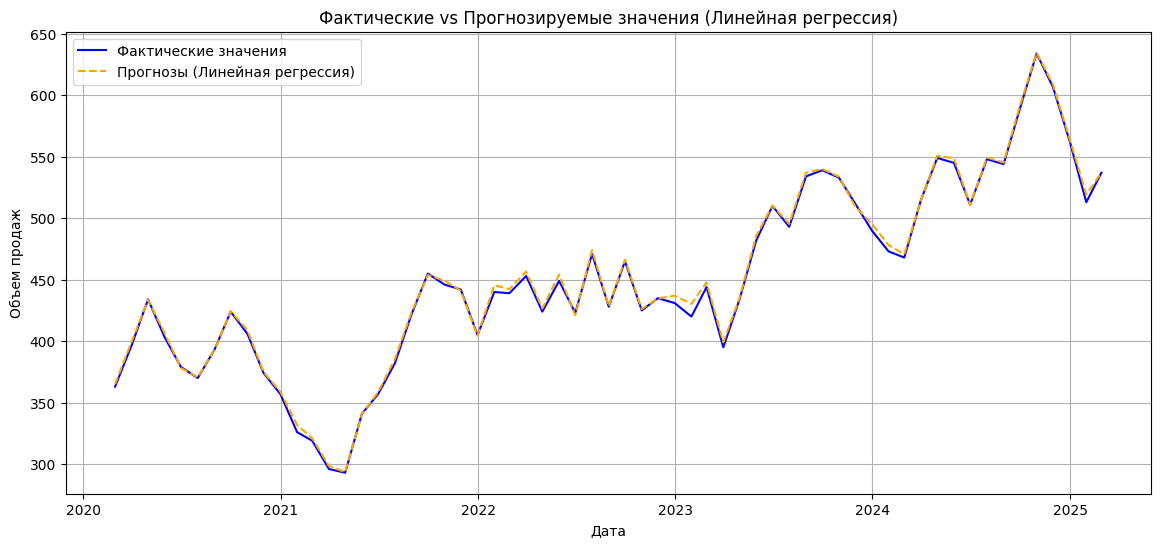

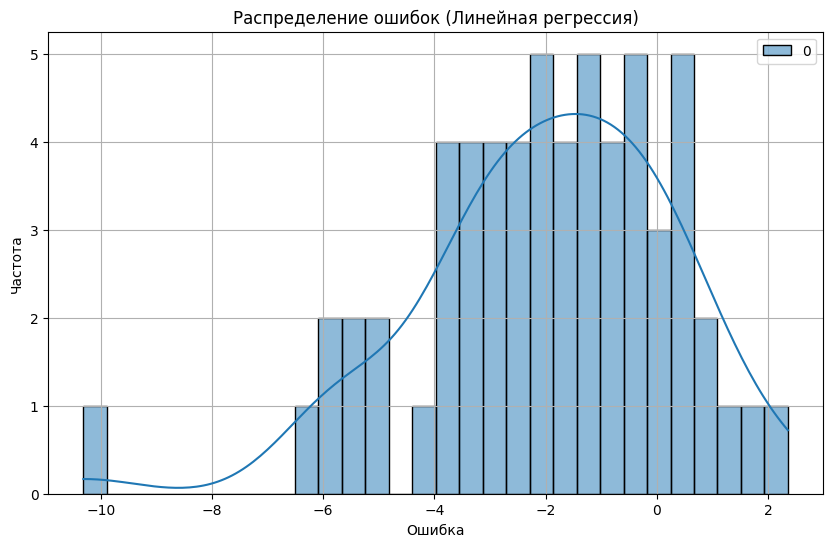

In [15]:
#график фактических vs прогнозируемых значений
plt.figure(figsize=(14, 6))
plt.plot(X_plot, y_test.values, label='Фактические значения', color='blue')
plt.plot(X_plot, y_pred_lr, label='Прогнозы (Линейная регрессия)', linestyle='--', color='orange')
plt.title('Фактические vs Прогнозируемые значения (Линейная регрессия)')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.legend()
plt.grid(True)
plt.show()

#гистограмма ошибок
errors_lr = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
sns.histplot(errors_lr, kde=True, bins=30, color='red')
plt.title('Распределение ошибок (Линейная регрессия)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [16]:
#сделаем DataFrame для хранения метрик
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MAE': [mae_lr],
    'RMSE': [rmse_lr],
    'R²': [r2_lr]
})

print(metrics_df)

               Model      MAE      RMSE        R²
0  Linear Regression  0.02403  0.177216  0.998361


In [17]:
import joblib

# Путь для сохранения модели
model_path = 'models/linear_regression_sales_model.pkl'

# Сохранение модели
joblib.dump(lr_model, model_path)
print(f"Модель успешно сохранена в {model_path}")

Модель успешно сохранена в models/linear_regression_sales_model.pkl


Данные

In [18]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])
    # Скользящие средние
df['rolling_mean_3'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_mean_6'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=6).mean())
    
    # Разница между текущими и предыдущими значениями
df['sales_diff_1'] = df.groupby('product_id')['sales_volume'].diff(1)
df['sales_diff_3'] = df.groupby('product_id')['sales_volume'].diff(3)
df['sales_diff_6'] = df.groupby('product_id')['sales_volume'].diff(6)

numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'sales_lag_1', 'sales_lag_3', 'sales_lag_6','rolling_mean_3', 'rolling_mean_6', 'sales_diff_1', 'sales_diff_3', 'sales_diff_6' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding для season
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# Label Encoding для product_id
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])

# Отделение целевого признака
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков
y = pd.DataFrame(df['sales_volume'])	
# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])

C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Попробуем градиентный бустинг

In [19]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Параметры LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'max_depth': 10,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Отделение целевого признака
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков
y = pd.DataFrame(df['sales_volume'])


# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])
# Создание модели
model = lgb.LGBMRegressor(**params)

In [20]:
# Обучение модели
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
              learning_rate=0.05, max_depth=10, metric='rmse',
              n_estimators=1000, objective='regression', verbose=-1)

In [21]:
# Предсказания
y_pred_lgb = model.predict(X_test)

# Расчет метрик
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MAE: {mae_lgb:.2f}")
print(f"RMSE: {rmse_lgb:.2f}")

MAE: 138.12
RMSE: 155.85


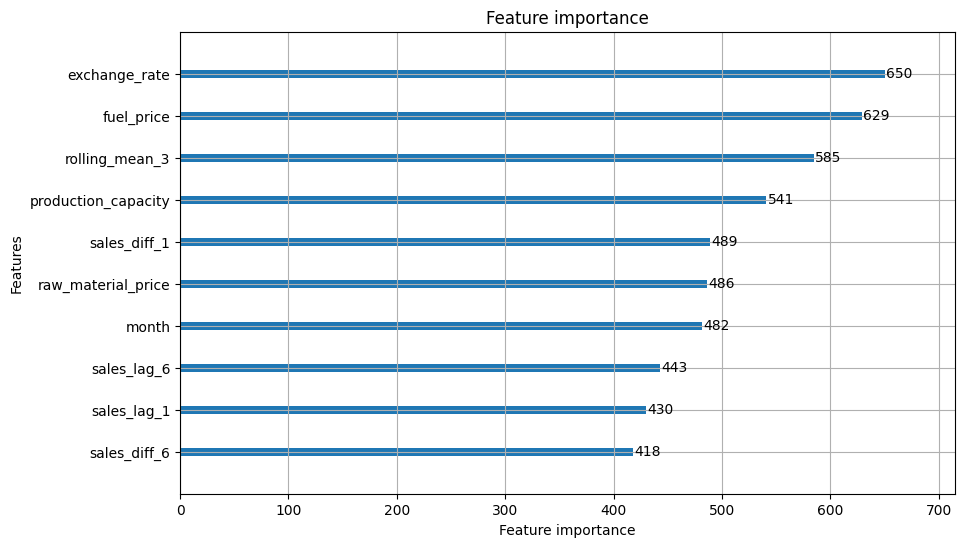

In [22]:
# Важность признаков

lgb.plot_importance(model, max_num_features=10, figsize=(10, 6))
plt.show()

In [23]:


# Сохранение модели
joblib.dump(model, 'sales_forecasting_model.pkl')

['sales_forecasting_model.pkl']

 RandomizedSearchCV для поиска оптимальных параметров модели.

In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.7, 0.8, 0.9]
}

search = RandomizedSearchCV(lgb.LGBMRegressor(), param_grid, n_iter=20, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

print("Лучшие параметры:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие параметры: {'num_leaves': 31, 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.01, 'feature_fraction': 0.7}


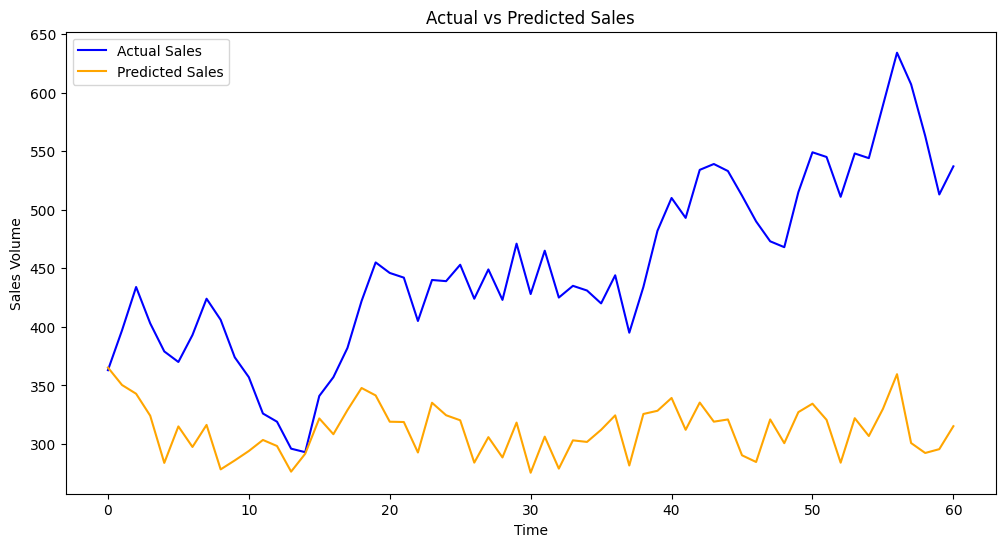

In [25]:
# График реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_lgb, label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

Тестирование

In [26]:
# Извлечение последней строки из датасета
last_row = df.iloc[-1].copy()

# Установка даты на следующий месяц
from dateutil.relativedelta import relativedelta

next_month_date = last_row['date'] + relativedelta(months=1)
last_row['date'] = next_month_date

# Обновление месяца и сезона
last_row['month'] = next_month_date.month
last_row['season'] = ['winter', 'spring', 'summer', 'fall'][(next_month_date.month - 1) // 3]

# Удаление целевой переменной (так как мы её прогнозируем)
last_row.pop('sales_volume')

# Генерация случайных значений для экономических факторов
import numpy as np


# Извлечение последней строки из датасета

last_row['raw_material_price'] = np.random.uniform(df['raw_material_price'].mean() * 0.9, df['raw_material_price'].mean() * 1.1)
last_row['fuel_price'] = np.random.uniform(df['fuel_price'].mean() * 0.9, df['fuel_price'].mean() * 1.1)
last_row['exchange_rate'] = np.random.uniform(df['exchange_rate'].mean() * 0.95, df['exchange_rate'].mean() * 1.05)
last_row['market_demand_index'] = np.random.randint(df['market_demand_index'].min(), df['market_demand_index'].max())
last_row['production_capacity'] = np.random.randint(df['production_capacity'].min(), df['production_capacity'].max())

# Определение праздников (is_holiday)
holidays = [1, 5, 12]  # Январь, май, декабрь
last_row['is_holiday'] = 1 if last_row['month'] in holidays else 0

# Лаговые признаки
last_row['sales_lag_1'] = last_row['sales_lag_3']
last_row['sales_lag_3'] = last_row['sales_lag_6']
last_row['sales_lag_6'] = df.iloc[-6]['sales_volume'] if len(df) >= 6 else 0

# One-hot encoding для season
last_row = pd.DataFrame([last_row])  # Преобразуем в DataFrame
last_row = pd.get_dummies(last_row, columns=['season'], drop_first=True)

# Убедимся, что столбцы совпадают с обучающими данными
missing_cols = set(X_train.columns) - set(last_row.columns)
for col in missing_cols:
    last_row[col] = 0  # Добавляем недостающие столбцы с нулевыми значениями

# Перестановка столбцов в том же порядке, что и в X_train
last_row = last_row[X_train.columns]

In [27]:
# Предсказание объема продаж
forecast = model.predict(last_row)

print(f"Прогнозируемый объем продаж на следующий месяц: {forecast[0]:.2f}")

Прогнозируемый объем продаж на следующий месяц: 302.11


In [28]:
# Создание DataFrame для хранения метрик
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM'],
    'MAE': [mae_lr, mae_lgb],
    'RMSE': [rmse_lr, rmse_lgb],
    'R²': [r2_lr, r2_lgb]
})

# Вывод DataFrame
print(metrics_df)

               Model         MAE        RMSE        R²
0  Linear Regression    0.024030    0.177216  0.998361
1           LightGBM  138.124557  155.847196 -3.310266


Данные

In [29]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])
    # Скользящие средние
df['rolling_mean_3'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_mean_6'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=6).mean())
    
    # Разница между текущими и предыдущими значениями
df['sales_diff_1'] = df.groupby('product_id')['sales_volume'].diff(1)
df['sales_diff_3'] = df.groupby('product_id')['sales_volume'].diff(3)
df['sales_diff_6'] = df.groupby('product_id')['sales_volume'].diff(6)

numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'sales_lag_1', 'sales_lag_3', 'sales_lag_6','rolling_mean_3', 'rolling_mean_6', 'sales_diff_1', 'sales_diff_3', 'sales_diff_6' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding для season
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# Label Encoding для product_id
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])

# Отделение целевого признака
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков
y = pd.DataFrame(df['sales_volume'])	
# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])

C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [30]:
import xgboost as xgb

# Параметры XGBoost
params = {
    'objective': 'reg:squarederror',  # Задача регрессии
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'max_depth': 10,
    'subsample': 0.8,  # Процент выборки для каждого дерева
    'colsample_bytree': 0.9,  # Процент признаков для каждого дерева
    'eval_metric': 'rmse',  # Метрика для оценки качества
    'early_stopping_rounds': 50,  # Ранняя остановка
    'verbosity': 0  # Отключение вывода
}

# Создание модели
model_xgb = xgb.XGBRegressor(**params)

# Обучение модели
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

[0]	validation_0-rmse:317.38845
[100]	validation_0-rmse:140.87800
[200]	validation_0-rmse:134.86538
[290]	validation_0-rmse:134.89505


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
# Предсказания
y_pred_xgb = model_xgb.predict(X_test)

# Расчет метрик
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Metrics:\nMAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost Metrics:
MAE: 116.43, RMSE: 134.76, R²: -2.22


Тестирование

In [32]:
# Извлечение последней строки из датасета
last_row = df.iloc[-1].copy()

# Установка даты на следующий месяц
from dateutil.relativedelta import relativedelta

next_month_date = last_row['date'] + relativedelta(months=1)
last_row['date'] = next_month_date

# Обновление месяца и сезона
last_row['month'] = next_month_date.month
last_row['season'] = ['winter', 'spring', 'summer', 'fall'][(next_month_date.month - 1) // 3]

# Удаление целевой переменной (так как мы её прогнозируем)
last_row.pop('sales_volume')

# Генерация случайных значений для экономических факторов
import numpy as np

last_row['raw_material_price'] = np.random.uniform(df['raw_material_price'].mean() * 0.9, df['raw_material_price'].mean() * 1.1)
last_row['fuel_price'] = np.random.uniform(df['fuel_price'].mean() * 0.9, df['fuel_price'].mean() * 1.1)
last_row['exchange_rate'] = np.random.uniform(df['exchange_rate'].mean() * 0.95, df['exchange_rate'].mean() * 1.05)
last_row['market_demand_index'] = np.random.randint(df['market_demand_index'].min(), df['market_demand_index'].max())
last_row['production_capacity'] = np.random.randint(df['production_capacity'].min(), df['production_capacity'].max())

# Определение праздников (is_holiday)
holidays = [1, 5, 12]  # Январь, май, декабрь
last_row['is_holiday'] = 1 if last_row['month'] in holidays else 0

# Лаговые признаки
last_row['sales_lag_1'] = last_row['sales_lag_3']
last_row['sales_lag_3'] = last_row['sales_lag_6']
last_row['sales_lag_6'] = df.iloc[-6]['sales_volume'] if len(df) >= 6 else 0

# One-hot encoding для season
last_row = pd.DataFrame([last_row])  # Преобразуем в DataFrame
last_row = pd.get_dummies(last_row, columns=['season'], drop_first=True)

# Убедимся, что столбцы совпадают с обучающими данными
missing_cols = set(X_train.columns) - set(last_row.columns)
for col in missing_cols:
    last_row[col] = 0  # Добавляем недостающие столбцы с нулевыми значениями

# Перестановка столбцов в том же порядке, что и в X_train
last_row = last_row[X_train.columns]

In [33]:
# Предсказание объема продаж
forecast = model_xgb.predict(last_row)

print(f"Прогнозируемый объем продаж на следующий месяц: {forecast[0]:.2f}")

Прогнозируемый объем продаж на следующий месяц: 346.56


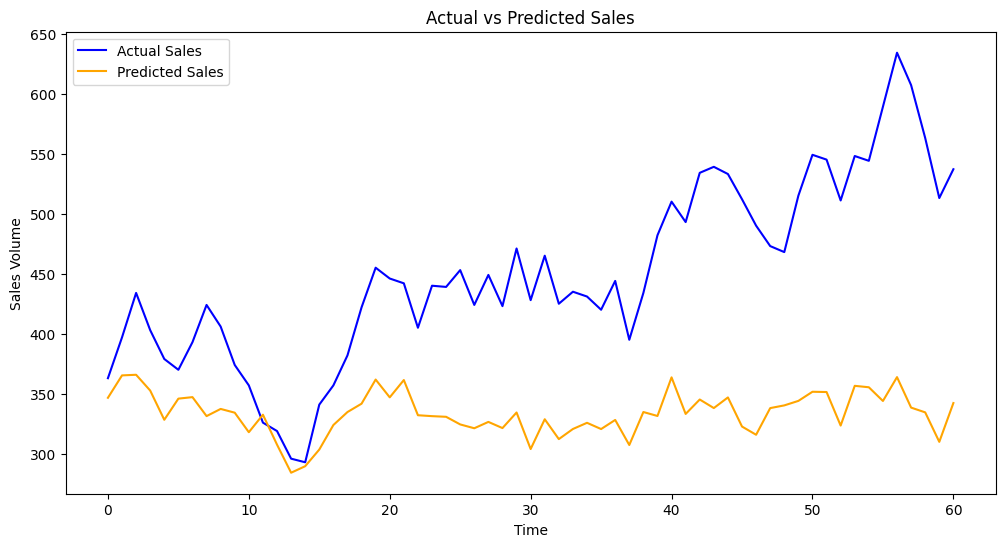

In [34]:
# График реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_xgb, label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

In [35]:
# Создание DataFrame для хранения метрик
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM', 'XGBoost'],
    'MAE': [mae_lr, mae_lgb, mae_xgb],
    'RMSE': [rmse_lr, rmse_lgb, rmse_xgb],
    'R²': [r2_lr, r2_lgb, r2_xgb]
})

# Вывод DataFrame
print(metrics_df)

               Model         MAE        RMSE        R²
0  Linear Regression    0.024030    0.177216  0.998361
1           LightGBM  138.124557  155.847196 -3.310266
2            XGBoost  116.427856  134.757156 -2.222625


In [36]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])
    # Скользящие средние
df['rolling_mean_3'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_mean_6'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=6).mean())
    
    # Разница между текущими и предыдущими значениями
df['sales_diff_1'] = df.groupby('product_id')['sales_volume'].diff(1)
df['sales_diff_3'] = df.groupby('product_id')['sales_volume'].diff(3)
df['sales_diff_6'] = df.groupby('product_id')['sales_volume'].diff(6)

numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'sales_lag_1', 'sales_lag_3', 'sales_lag_6','rolling_mean_3', 'rolling_mean_6', 'sales_diff_1', 'sales_diff_3', 'sales_diff_6' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding для season
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# Label Encoding для product_id
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])

# Отделение целевого признака
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков
y = pd.DataFrame(df['sales_volume'])	
# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])

C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3479796300.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [37]:
from catboost import CatBoostRegressor

# Параметры CatBoost
params = {
    'loss_function': 'RMSE',  # Функция потерь для регрессии
    'learning_rate': 0.05,
    'iterations': 1000,  # Количество деревьев
    'depth': 6,  # Глубина деревьев
    'random_seed': 42,
    'verbose': 100,  # Вывод информации каждые 100 итераций
    'early_stopping_rounds': 50  # Ранняя остановка
}

# Создание модели
model_catboost = CatBoostRegressor(**params)

# Обучение модели
model_catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True  # Использование лучшей модели по результатам валидации
)

0:	learn: 93.4872719	test: 320.6853124	best: 320.6853124 (0)	total: 157ms	remaining: 2m 36s
100:	learn: 11.2551391	test: 176.2365239	best: 176.2365239 (100)	total: 315ms	remaining: 2.8s
200:	learn: 4.9102190	test: 160.7187714	best: 160.7187714 (200)	total: 503ms	remaining: 2s
300:	learn: 2.7918054	test: 158.8128531	best: 158.7978412 (298)	total: 700ms	remaining: 1.63s
400:	learn: 1.6824775	test: 158.4734781	best: 158.4734781 (400)	total: 899ms	remaining: 1.34s
500:	learn: 1.0897061	test: 158.2799861	best: 158.2799861 (500)	total: 1.13s	remaining: 1.13s
600:	learn: 0.7019909	test: 158.2025596	best: 158.2025596 (600)	total: 1.35s	remaining: 894ms
700:	learn: 0.4861042	test: 158.1025567	best: 158.1011276 (699)	total: 1.6s	remaining: 682ms
800:	learn: 0.3435299	test: 158.0437873	best: 158.0433552 (799)	total: 1.85s	remaining: 461ms
900:	learn: 0.2372664	test: 158.0188111	best: 158.0182514 (898)	total: 2.08s	remaining: 229ms
999:	learn: 0.1694723	test: 157.9996084	best: 157.9971227 (986)	to

In [38]:
# Предсказания
y_pred_catboost = model_catboost.predict(X_test)

# Расчет метрик
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Metrics:\nMAE: {mae_catboost:.2f}, RMSE: {rmse_catboost:.2f}, R²: {r2_catboost:.2f}")

CatBoost Metrics:
MAE: 140.98, RMSE: 158.00, R²: -3.43


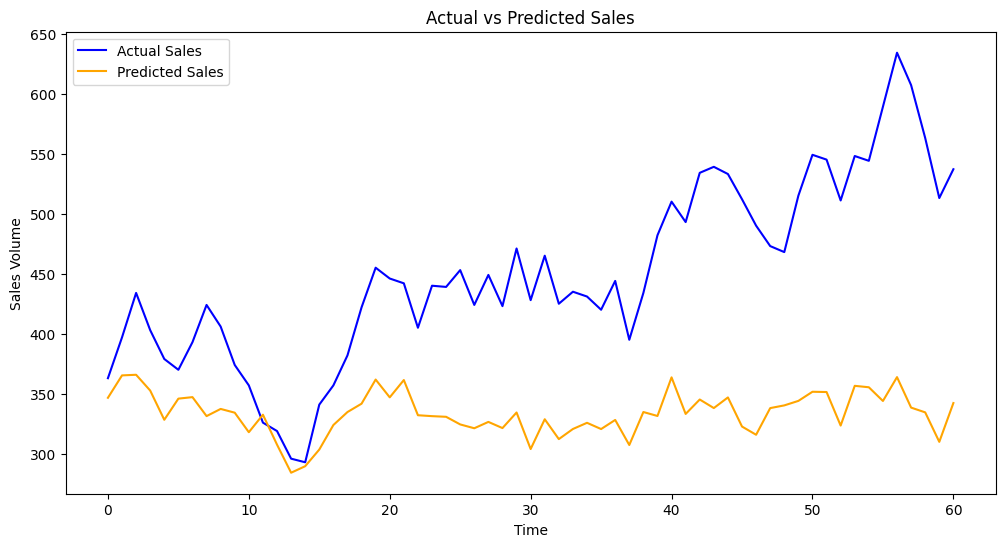

In [39]:
# График реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_xgb, label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

In [40]:
# Извлечение последней строки из датасета
last_row = df.iloc[-1].copy()

# Установка даты на следующий месяц
from dateutil.relativedelta import relativedelta

next_month_date = last_row['date'] + relativedelta(months=1)
last_row['date'] = next_month_date

# Обновление месяца и сезона
last_row['month'] = next_month_date.month
last_row['season'] = ['winter', 'spring', 'summer', 'fall'][(next_month_date.month - 1) // 3]

# Удаление целевой переменной (так как мы её прогнозируем)
last_row.pop('sales_volume')


# Генерация случайных значений для экономических факторов

last_row['raw_material_price'] = np.random.uniform(df['raw_material_price'].mean() * 0.9, df['raw_material_price'].mean() * 1.1)
last_row['fuel_price'] = np.random.uniform(df['fuel_price'].mean() * 0.9, df['fuel_price'].mean() * 1.1)
last_row['exchange_rate'] = np.random.uniform(df['exchange_rate'].mean() * 0.95, df['exchange_rate'].mean() * 1.05)
last_row['market_demand_index'] = np.random.randint(df['market_demand_index'].min(), df['market_demand_index'].max())
last_row['production_capacity'] = np.random.randint(df['production_capacity'].min(), df['production_capacity'].max())

# Если last_row — это Series
if isinstance(last_row, pd.Series):
    last_row = last_row.to_frame().T  # Преобразуем в DataFrame
if isinstance(last_row, pd.DataFrame):
    last_row = last_row.iloc[0].to_dict()  # Извлекаем первую строку как словарь
    last_row = pd.DataFrame([last_row])  # Создаем DataFrame из словаря
# Определение праздников (is_holiday)
holidays = [1, 5, 12]  # Январь, май, декабрь
last_row['is_holiday'] = 1 if last_row['month'].item() in holidays else 0

# Лаговые признаки
last_row['sales_lag_1'] = last_row['sales_lag_3']
last_row['sales_lag_3'] = last_row['sales_lag_6']
last_row['sales_lag_6'] = df.iloc[-6]['sales_volume'] if len(df) >= 6 else 0

# One-hot encoding для season
last_row = pd.get_dummies(last_row, columns=['season'], drop_first=True)

# Убедимся, что столбцы совпадают с обучающими данными
missing_cols = set(X_train.columns) - set(last_row.columns)
for col in missing_cols:
    last_row[col] = 0  # Добавляем недостающие столбцы с нулевыми значениями

# Перестановка столбцов в том же порядке, что и в X_train
last_row = last_row[X_train.columns]

In [41]:
# Предсказание объема продаж
forecast = model_xgb.predict(last_row)

print(f"Прогнозируемый объем продаж на следующий месяц: {forecast[0]:.2f}")

Прогнозируемый объем продаж на следующий месяц: 342.34


In [42]:
# Создание DataFrame для хранения метрик
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM', 'XGBoost', 'Catboost'],
    'MAE': [mae_lr, mae_lgb, mae_xgb, mae_catboost],
    'RMSE': [rmse_lr, rmse_lgb, rmse_xgb, rmse_catboost],
    'R²': [r2_lr, r2_lgb, r2_xgb, r2_catboost]
})

# Вывод DataFrame
print(metrics_df)

               Model         MAE        RMSE        R²
0  Linear Regression    0.024030    0.177216  0.998361
1           LightGBM  138.124557  155.847196 -3.310266
2            XGBoost  116.427856  134.757156 -2.222625
3           Catboost  140.979269  157.997123 -3.430007


In [43]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])


numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding для season
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# Label Encoding для product_id
le = LabelEncoder()
df['product_id'] = le.fit_transform(df['product_id'])

# Отделение целевого признака
y = df[['date','sales_volume']].set_index('date')
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков


# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])

C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3537785008.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3537785008.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [44]:
# Создаем временной ряд
sales_ts = df[['date', 'sales_volume']].set_index('date')
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(sales_ts[:train_size]), pd.DataFrame(sales_ts[train_size:])
y_train, y_test = pd.DataFrame(sales_ts[:train_size]), pd.DataFrame(sales_ts[train_size:])

# Убедимся, что индекс — дата
sales_ts.index = pd.to_datetime(sales_ts.index)
y_test.index = pd.to_datetime(y_test.index)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели
model_arima = ARIMA(X_train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Расчет метрик на тестовой выборке
# (Для теста возьмем последние N месяцев из обучающих данных)
y_pred_arima = model_arima_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1)
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
r2_arima = r2_score(y_test, y_pred_arima)

print(f"ARIMA Metrics:\nMAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, R²: {r2_arima:.2f}")

C:\Users\Егор\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Егор\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Егор\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA Metrics:
MAE: 136.90, RMSE: 155.13, R²: -3.27


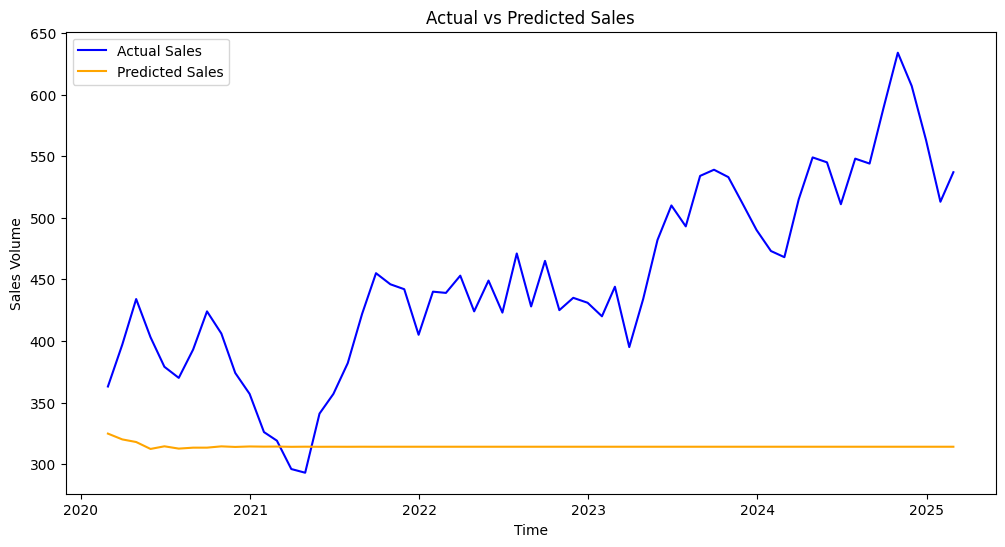

In [46]:
# График реальных и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Sales', color='blue')
plt.plot(y_pred_arima, label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

In [47]:
# Создание DataFrame для хранения метрик
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM', 'XGBoost', 'Catboost', 'ARIMA'],
    'MAE': [mae_lr, mae_lgb, mae_xgb, mae_catboost, mae_arima],
    'RMSE': [rmse_lr, rmse_lgb, rmse_xgb, rmse_catboost, rmse_arima],
    'R²': [r2_lr, r2_lgb, r2_xgb, r2_catboost,r2_arima]
})

# Вывод DataFrame
print(metrics_df)

               Model         MAE        RMSE        R²
0  Linear Regression    0.024030    0.177216  0.998361
1           LightGBM  138.124557  155.847196 -3.310266
2            XGBoost  116.427856  134.757156 -2.222625
3           Catboost  140.979269  157.997123 -3.430007
4              ARIMA  136.902228  155.132704 -3.270835


In [48]:
# Предсказание следующего месяца
forecast = model_arima_fit.forecast(steps=1)
print(f"Прогноз на следующий месяц: {forecast[0]:.2f}")

Прогноз на следующий месяц: 324.76


C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\2888235845.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Прогноз на следующий месяц: {forecast[0]:.2f}")


In [49]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])
    # Скользящие средние
df['rolling_mean_3'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=3).mean())
df['rolling_mean_6'] = df.groupby('product_id')['sales_volume'].transform(lambda x: x.rolling(window=6).mean())
    
    # Разница между текущими и предыдущими значениями
df['sales_diff_1'] = df.groupby('product_id')['sales_volume'].diff(1)
df['sales_diff_3'] = df.groupby('product_id')['sales_volume'].diff(3)
df['sales_diff_6'] = df.groupby('product_id')['sales_volume'].diff(6)

numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'sales_lag_1', 'sales_lag_3', 'sales_lag_6','rolling_mean_3', 'rolling_mean_6', 'sales_diff_1', 'sales_diff_3', 'sales_diff_6' ]
categorical_cols = ['season']

# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Категориальные признаки заполним наиболее частым значением
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-Hot Encoding для season


# Label Encoding для product_id
le = LabelEncoder()
#df = pd.get_dummies(df, columns=['season'], drop_first=True)
#df['season'] = le.fit_transform(df['season'])
df['product_id'] = le.fit_transform(df['product_id'])

# Отделение целевого признака
y = df[['date','sales_volume']].set_index('date')
X = df.drop(columns=['sales_volume', 'date'])  # Исключаем 'date' из признаков


# Разделение на train и test с учетом времени
train_size = int(len(X) * 0.8)  # 80% для обучения
X_train, X_test = pd.DataFrame(X[:train_size]), pd.DataFrame(X[train_size:])
y_train, y_test = pd.DataFrame(y[:train_size]), pd.DataFrame(y[train_size:])

C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3690273511.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\3690273511.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [50]:
df = pd.read_csv('data/sales_forecasting_dataset.csv')
df['date'] = pd.to_datetime(df['date'])
numeric_cols = ['sales_volume', 'raw_material_price', 'fuel_price', 'exchange_rate', 'market_demand_index', 'production_capacity', 
                   'is_holiday' ]


# Числовые признаки заполним медианой
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)


# Выберите признаки, кроме sales_volume и даты
exog_features = df[['raw_material_price', 'fuel_price', 'exchange_rate', 
                   'market_demand_index', 'production_capacity', 
                   'is_holiday']]


C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\751749478.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Егор\AppData\Local\Temp\ipykernel_51684\751749478.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Выбор признаков
exog_features = df[['raw_material_price', 'fuel_price', 'exchange_rate',
                   'market_demand_index', 'production_capacity', 
                   'is_holiday']]

# Разделение на train/test
y = df[['date','sales_volume']].set_index('date')
train_size = int(len(df) * 0.8)
train_endog = df['sales_volume'][:train_size]
train_exog = exog_features[:train_size]
test_endog = df['sales_volume'][train_size:]
test_exog = exog_features[train_size:]

# Обучение SARIMAX
model_sarimax = SARIMAX(
    endog=train_endog,
    exog=train_exog,
    order=(5,1,0),
    seasonal_order=(1,1,0,12)
)
model_sarimax_fit = model_sarimax.fit()

# Прогноз для теста
forecast = model_sarimax_fit.forecast(steps=len(test_endog), exog=test_exog)

y_pred_sarimax = forecast

# Метрики
mae_sarimax = mean_absolute_error(test_endog, forecast)
rmse_sarimax = np.sqrt(mean_squared_error(test_endog, forecast))
r2_sarimax = r2_score(test_endog, forecast)
print(f"SARIMAX Metrics: MAE={mae_sarimax:.2f}, RMSE={rmse_sarimax:.2f}, R²={r2_sarimax:.2f}")


print(metrics_df)

SARIMAX Metrics: MAE=238.03, RMSE=272.67, R²=-12.19
               Model         MAE        RMSE        R²
0  Linear Regression    0.024030    0.177216  0.998361
1           LightGBM  138.124557  155.847196 -3.310266
2            XGBoost  116.427856  134.757156 -2.222625
3           Catboost  140.979269  157.997123 -3.430007
4              ARIMA  136.902228  155.132704 -3.270835
